In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.mobilenet import MobileNet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from PIL import Image
sns.set()
#from tqdm import tqdm
%matplotlib inline

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Making Some Functions

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import SensitivityAtSpecificity


def test_metrics_with_best_model(checkpoint_filepath):

    # Specify the path to the saved model
    model_path = checkpoint_filepath

    # Load the model with the custom metric
    loaded_model = load_model(model_path, custom_objects=custom_objects)

    # Evaluate the model on the test dataset
    test_metrics = loaded_model.evaluate(test_generator, verbose=1)

    # Display the test metrics
    print(f'Test Metrics: {loaded_model.metrics_names[0]}: {test_metrics[0]}, {loaded_model.metrics_names[1]}: {test_metrics[1]}')


In [5]:
def plot_all_metrics():

    # Extract the metrics from the training history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    auc_roc = history.history['val_auc']
    precision = history.history['val_precision']
    recall = history.history['val_recall']
    tp = history.history['val_tp']
    tn = history.history['val_tn']
    fp = history.history['val_fp']
    fn = history.history['val_fn']

    # Create a list of epoch numbers
    epochs = range(1, len(accuracy) + 1)

    # Plot the metrics
    plt.figure(figsize=(18, 9))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, auc_roc, 'b', label='AUC-ROC')
    plt.plot(epochs, precision, 'r', label='Precision')
    plt.plot(epochs, recall, 'g', label='Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('AUC-ROC, Precision, and Recall')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, tp, 'b', label='True Positives')
    plt.plot(epochs, fp, 'r', label='False Positives')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('True Positives and False Positives')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, tn, 'g', label='True Negatives')
    plt.plot(epochs, fn, 'y', label='False Negatives')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('True Negatives and False Negatives')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [6]:
import matplotlib.pyplot as plt

def plot_accuracy():
    # Extract the metrics from the training history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a list of epoch numbers
    epochs = range(1, len(accuracy) + 1)

    # Plot the metrics
    plt.figure(figsize=(18, 9))

    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs', fontsize=24)  # Set fontsize for x-axis label
    plt.ylabel('Accuracy', fontsize=24)  # Set fontsize for y-axis label
    plt.title('Training and Validation Accuracy', fontsize=28)  # Set fontsize for title
    plt.legend(prop={'size': 16})  # Set fontsize for legend
    
    plt.xticks(fontsize=16)  # Set fontsize for x-axis ticks
    plt.yticks(fontsize=16) 
    
    plt.show()  # Display the plot

    

In [7]:
def plot_AUC_ROC():

    # Extract the metrics from the training history
    accuracy = history.history['accuracy']
    auc_roc = history.history['val_auc']
    precision = history.history['val_precision']
    recall = history.history['val_recall']

    # Create a list of epoch numbers
    epochs = range(1, len(accuracy) + 1)
    
    # Plot the metrics
    plt.figure(figsize=(18, 9))

    plt.plot(epochs, auc_roc, 'b', label='AUC-ROC')
    plt.plot(epochs, precision, 'r', label='Precision')
    plt.plot(epochs, recall, 'g', label='Recall')
    plt.xlabel('Epochs', fontsize=24)
    plt.ylabel('Metrics', fontsize=24)
    plt.title('AUC-ROC, Precision, and Recall', fontsize=28)
    plt.legend(prop={'size': 16})
    
    plt.xticks(fontsize=16)  # Set fontsize for x-axis ticks
    plt.yticks(fontsize=16) 
    
    plt.show()

In [8]:
def plot_loss():

    # Extract the loss from the training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a list of epoch numbers
    epochs = range(1, len(loss) + 1)

    # Plot the loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


In [9]:
def plot_confusion_matrix_raw_and_classification_report(model):

    from sklearn.metrics import confusion_matrix
    import numpy as np

    # Assuming you have a test generator that yields both images and labels
    #test_generator = get_generator(...)  # Replace ... with your actual parameters

    # Get the true labels and predictions from your model
    true_labels = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])
    predictions = model.predict_generator(test_generator).round()

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels.argmax(axis=1), predictions.argmax(axis=1))

    print("Confusion Matrix:")
    print(conf_matrix)
    
    from sklearn.metrics import classification_report

    print(classification_report(true_labels, predictions))


In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

def plot_colored_confusion_matrix(model):

    # Get the true labels and predictions from your model
    true_labels = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])
    predictions = model.predict_generator(test_generator).round()

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels.argmax(axis=1), predictions.argmax(axis=1))

    # Function to plot a colored confusion matrix
    def plot_confusion_matrix(conf_matrix, classes, normalize=False, cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

        plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

    # Define class labels based on your problem
    class_labels = labels  # Modify as needed

    # Plot the colored confusion matrix
    plt.figure(figsize=(5, 5))
    plot_confusion_matrix(conf_matrix, classes=class_labels, normalize=True, cmap=plt.cm.Blues)
    plt.show()

In [11]:
def show_predicted_probabilities_for_one_example():

    # Predict the class probabilities for one batch of images
    batch_images, batch_labels = test_generator.next()
    print("actual label: ", batch_labels[0])
    a = labels[np.argmax(batch_labels[0])]
    print('Actual class: ', a)
    
    predictions = model.predict(batch_images)

    # Print the predicted probabilities for the first image in the batch
    print("Predicted Probabilities:")
    print(predictions[0])

    # Get the predicted class index for the first image
    predicted_class_index = np.argmax(predictions[0])

    # Assuming you have a label mapping for class names
    predicted_class_name = labels[predicted_class_index]  # Replace 'labels' with your actual label mapping

    print("Predicted Class:", predicted_class_name)

# Image and mask generator

In [12]:
def create_data_generators(image_folder, mask_folder, batch_size, target_size):
    image_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=30,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    mask_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=30,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    image_generator = image_datagen.flow_from_directory(
        image_folder,
        classes=None,
        class_mode=None,
        color_mode='grayscale',
        target_size=target_size,
        batch_size=batch_size,
        seed=1
    )

    mask_generator = mask_datagen.flow_from_directory(
        mask_folder,
        classes=None,
        class_mode=None,
        color_mode='grayscale',
        target_size=target_size,
        batch_size=batch_size,
        seed=1
    )

    return zip(image_generator, mask_generator)

In [13]:
# Training settings
train_image_folder = r"F:\Pneumonia segmentation\Dataset\Pneumonia Train Images"
train_mask_folder = r"F:\Pneumonia segmentation\Dataset\Pneumonia Train Masks"
test_image_folder = r"F:\Pneumonia segmentation\Dataset\Pneumonia Test Images"
test_mask_folder = r"F:\Pneumonia segmentation\Dataset\Pneumonia Test Maks"

input_size = (256, 256, 1)
batch_size = 8
epochs = 50
target_size = (256, 256)

In [14]:
# Create data generators
train_generator = create_data_generators(train_image_folder, train_mask_folder, batch_size, target_size)
test_generator = create_data_generators(test_image_folder, test_mask_folder, batch_size, target_size)

Found 2379 images belonging to 1 classes.
Found 2379 images belonging to 1 classes.
Found 290 images belonging to 1 classes.
Found 290 images belonging to 1 classes.


# Define U-net model

In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def contraction(prev_layer, filters, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.1):
    c = layers.Conv2D(filters, kernel_size, activation=activation, kernel_initializer=kernel_initializer, padding=padding)(prev_layer)
    c = layers.Dropout(dropout)(c)
    c = layers.Conv2D(filters, kernel_size, activation=activation, kernel_initializer=kernel_initializer, padding=padding)(c)
    p = layers.MaxPooling2D((2,2))(c)

    return c, p



def expansion(prev_layer, skip_connection, filters,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.1):
    u = layers.Conv2DTranspose(filters, (2,2), strides = (2,2), padding=padding)(prev_layer)
    u = layers.concatenate([u, skip_connection])
    u = layers.Conv2D(filters, kernel_size, activation=activation, kernel_initializer=kernel_initializer, padding=padding)(u)
    u = layers.Dropout(dropout)(u)
    u = layers.Conv2D(filters, kernel_size, activation=activation, kernel_initializer=kernel_initializer, padding=padding)(u)
    return u

#def expansion(prev_layer, skip_connection, filters, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.1):
#    u = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding=padding)(prev_layer)
#    u = layers.concatenate([u, skip_connection])
#    u = layers.Conv2D(filters, kernel_size, activation=activation, kernel_initializer=kernel_initializer, padding=padding)(u)
#    u = layers.Dropout(dropout)(u)
#    u = layers.Conv2D(filters, kernel_size, activation=activation, kernel_initializer=kernel_initializer, padding=padding)(u)
#    return u

def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Contracting path
    c1, p1 = contraction(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.1, prev_layer=inputs)
    c2, p2 = contraction(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.1, prev_layer=p1)
    c3, p3 = contraction(filters=256, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.2, prev_layer=p2)
    c4, p4 = contraction(filters=512, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.2, prev_layer=p3)
    c5, p5 = contraction(filters=1024, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same', dropout=0.3, prev_layer=p4)

    # Expansion path
    u6 = expansion(filters=512, prev_layer=c5, dropout=0.2, skip_connection=c4)
    u7 = expansion(filters=256, prev_layer=u6, dropout=0.2, skip_connection=c3)
    u8 = expansion(filters=128, prev_layer=u7, dropout=0.1, skip_connection=c2)
    u9 = expansion(filters=64, prev_layer=u8, dropout=0.1, skip_connection=c1)



    outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(u9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model


model = unet_model()

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 64  640         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 256, 256, 64  0           ['conv2d_38[0][0]']              
                                )                                                           

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_filepath = 'unet_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)



In [26]:


# Train the model
history = model.fit(train_generator, steps_per_epoch=100, epochs=200, validation_data=test_generator,shuffle=True, validation_steps=20, callbacks=[model_checkpoint_callback])


Epoch 1/200
100/100 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 0.9743
Epoch 1: val_loss improved from inf to 0.06741, saving model to unet_best_model.h5
100/100 [==============================] - 43s 411ms/step - loss: 0.1082 - accuracy: 0.9743 - val_loss: 0.0674 - val_accuracy: 0.9849
Epoch 2/200
100/100 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9850
Epoch 2: val_loss did not improve from 0.06741
100/100 [==============================] - 40s 402ms/step - loss: 0.0717 - accuracy: 0.9850 - val_loss: 0.0716 - val_accuracy: 0.9832
Epoch 3/200
100/100 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9847
Epoch 3: val_loss improved from 0.06741 to 0.06378, saving model to unet_best_model.h5
100/100 [==============================] - 41s 409ms/step - loss: 0.0675 - accuracy: 0.9847 - val_loss: 0.0638 - val_accuracy: 0.9855
Epoch 4/200
100/100 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 

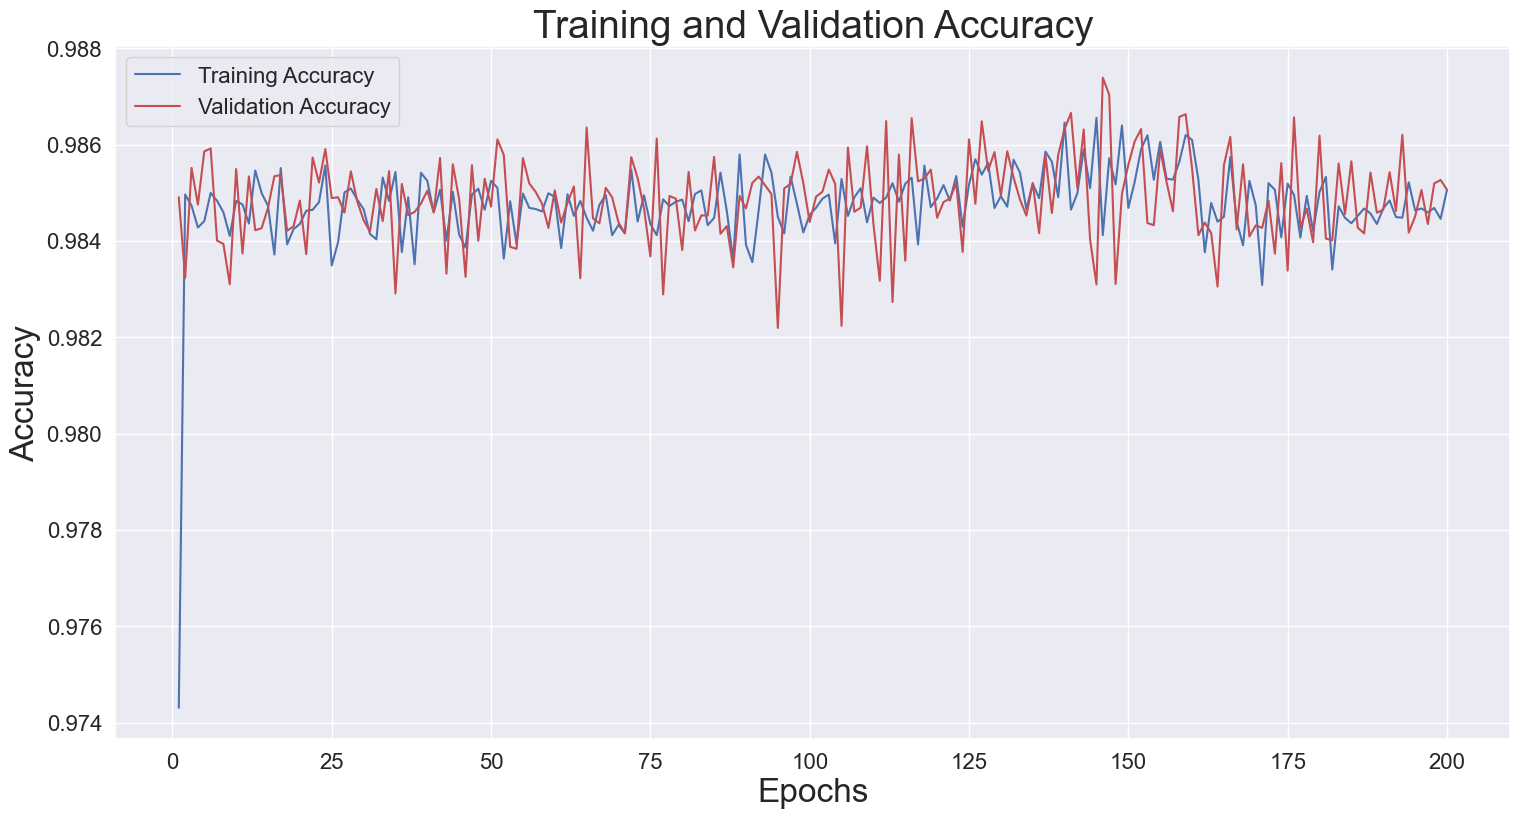

In [27]:
plot_accuracy()

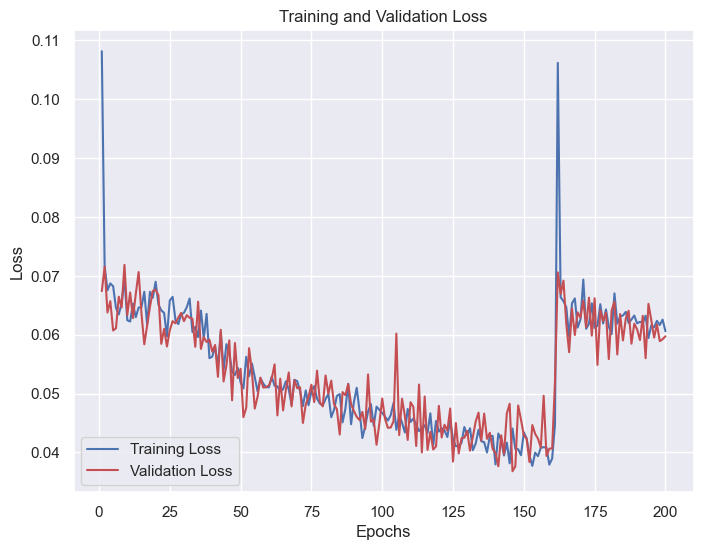

In [28]:
plot_loss()

In [30]:
best_model = load_model('unet_best_model.h5')

1/1 [==============================] - 0s 21ms/step


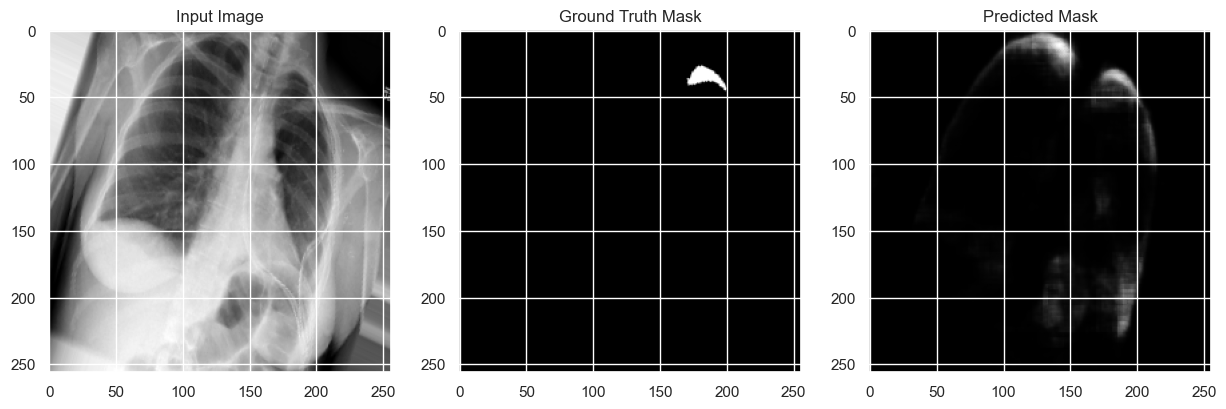

In [37]:
def visualize_prediction(model, test_generator):
    test_images, test_masks = next(test_generator)
    test_image = test_images[0]
    test_mask = test_masks[0]
    
    prediction = model.predict(np.expand_dims(test_image, axis=0))[0]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(test_image.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth Mask')
    plt.imshow(test_mask.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted Mask')
    plt.imshow(prediction.squeeze(), cmap='gray')
    
    plt.show()

# Visualize the prediction for one test image
visualize_prediction(best_model, test_generator)

In [39]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=100, epochs=200, validation_data=test_generator,shuffle=True, validation_steps=20, callbacks=[model_checkpoint_callback])


Epoch 1/200
100/100 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9842
Epoch 1: val_loss did not improve from 0.03681
100/100 [==============================] - 36s 362ms/step - loss: 0.0637 - accuracy: 0.9842 - val_loss: 0.0607 - val_accuracy: 0.9847
Epoch 2/200
100/100 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9847
Epoch 2: val_loss did not improve from 0.03681
100/100 [==============================] - 35s 355ms/step - loss: 0.0612 - accuracy: 0.9847 - val_loss: 0.0621 - val_accuracy: 0.9843
Epoch 3/200
100/100 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9849
Epoch 3: val_loss did not improve from 0.03681
100/100 [==============================] - 36s 356ms/step - loss: 0.0604 - accuracy: 0.9849 - val_loss: 0.0572 - val_accuracy: 0.9859
Epoch 4/200
100/100 [==============================] - ETA: 0s - loss: 0.0635 - accuracy: 0.9840
Epoch 4: val_loss did not improve from 0.03681
100/100 [=============

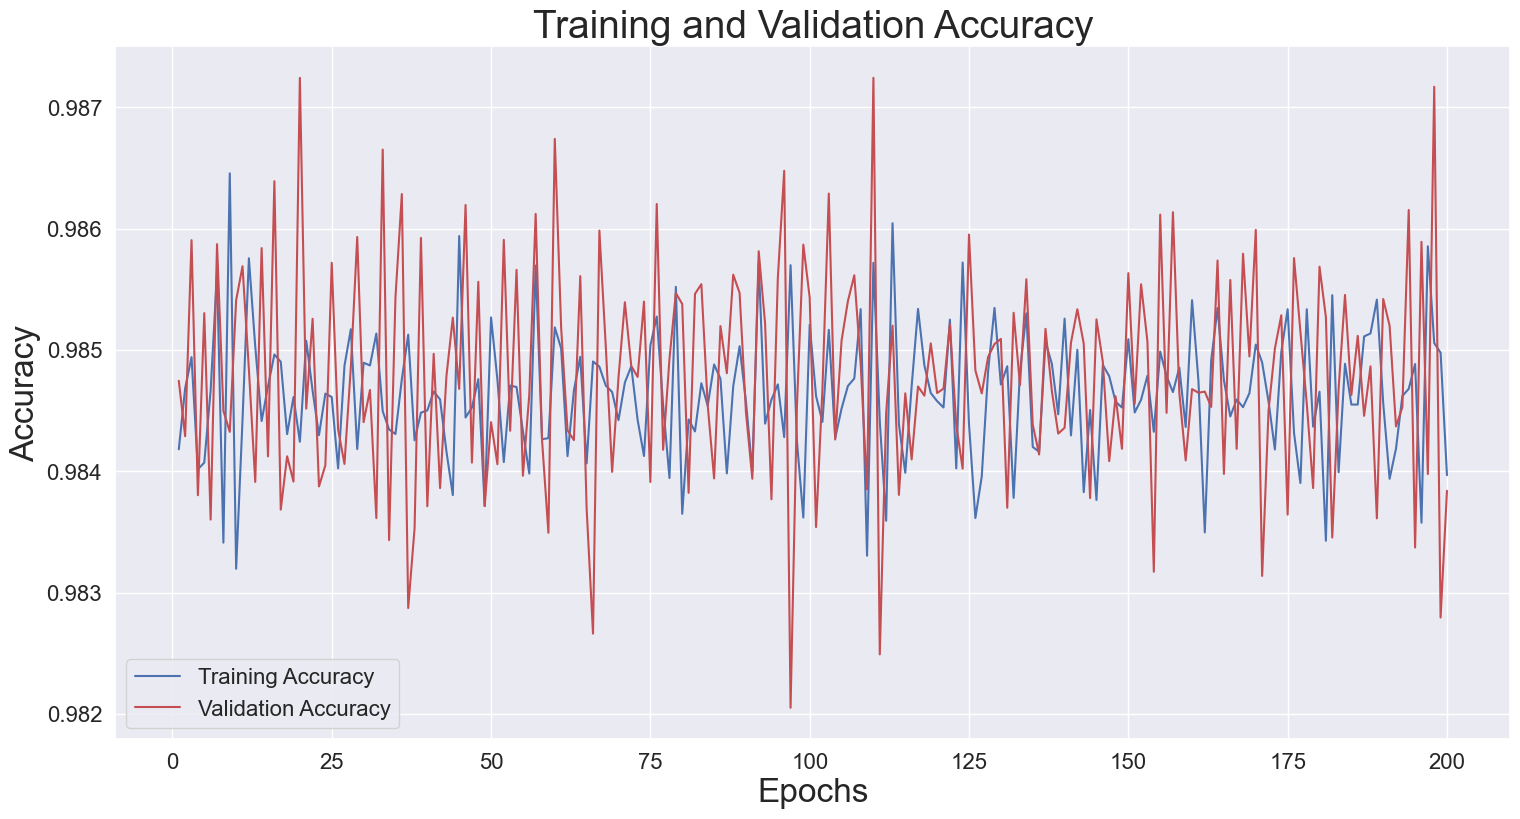

In [40]:
plot_accuracy()

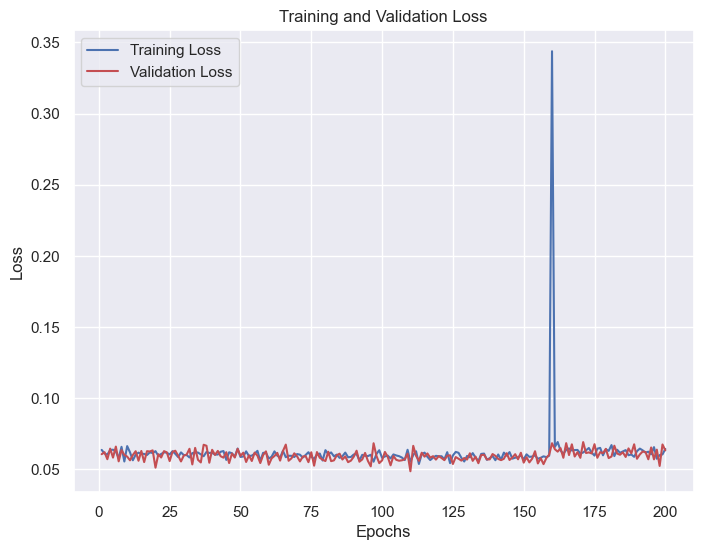

In [41]:
plot_loss()

In [43]:
best_model = load_model('unet_best_model.h5')

1/1 [==============================] - 0s 20ms/step


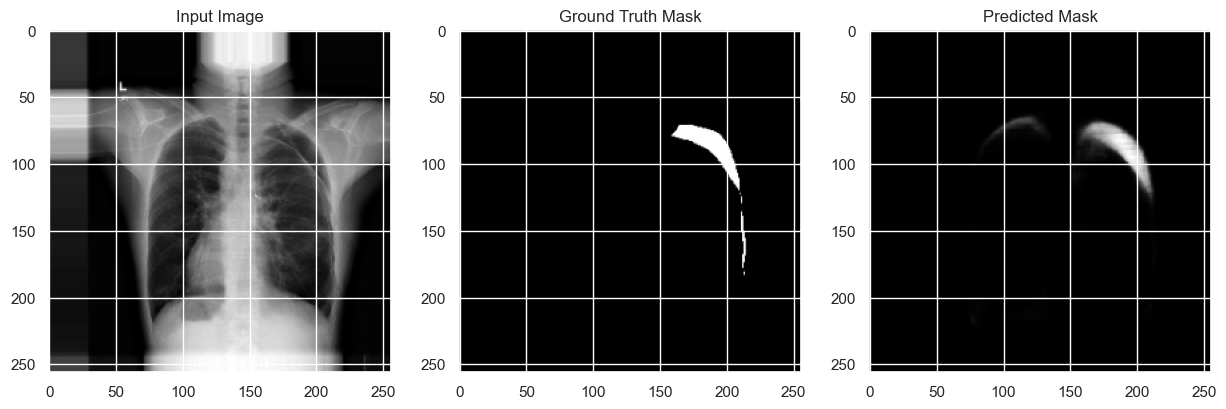

In [49]:
def visualize_prediction(model, test_generator):
    test_images, test_masks = next(test_generator)
    test_image = test_images[0]
    test_mask = test_masks[0]
    
    prediction = model.predict(np.expand_dims(test_image, axis=0))[0]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(test_image.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth Mask')
    plt.imshow(test_mask.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted Mask')
    plt.imshow(prediction.squeeze(), cmap='gray')
    
    plt.show()

# Visualize the prediction for one test image
visualize_prediction(best_model, test_generator)

In [50]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=100, epochs=1000, validation_data=test_generator,shuffle=True, validation_steps=20, callbacks=[model_checkpoint_callback])


Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9852
Epoch 1: val_loss did not improve from 0.03681
100/100 [==============================] - 37s 364ms/step - loss: 0.0595 - accuracy: 0.9852 - val_loss: 0.0629 - val_accuracy: 0.9840
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9845
Epoch 2: val_loss did not improve from 0.03681
100/100 [==============================] - 35s 354ms/step - loss: 0.0618 - accuracy: 0.9845 - val_loss: 0.0643 - val_accuracy: 0.9837
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9845
Epoch 3: val_loss did not improve from 0.03681
100/100 [==============================] - 35s 355ms/step - loss: 0.0618 - accuracy: 0.9845 - val_loss: 0.0600 - val_accuracy: 0.9853
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9841
Epoch 4: val_loss did not improve from 0.03681
100/100 [=========

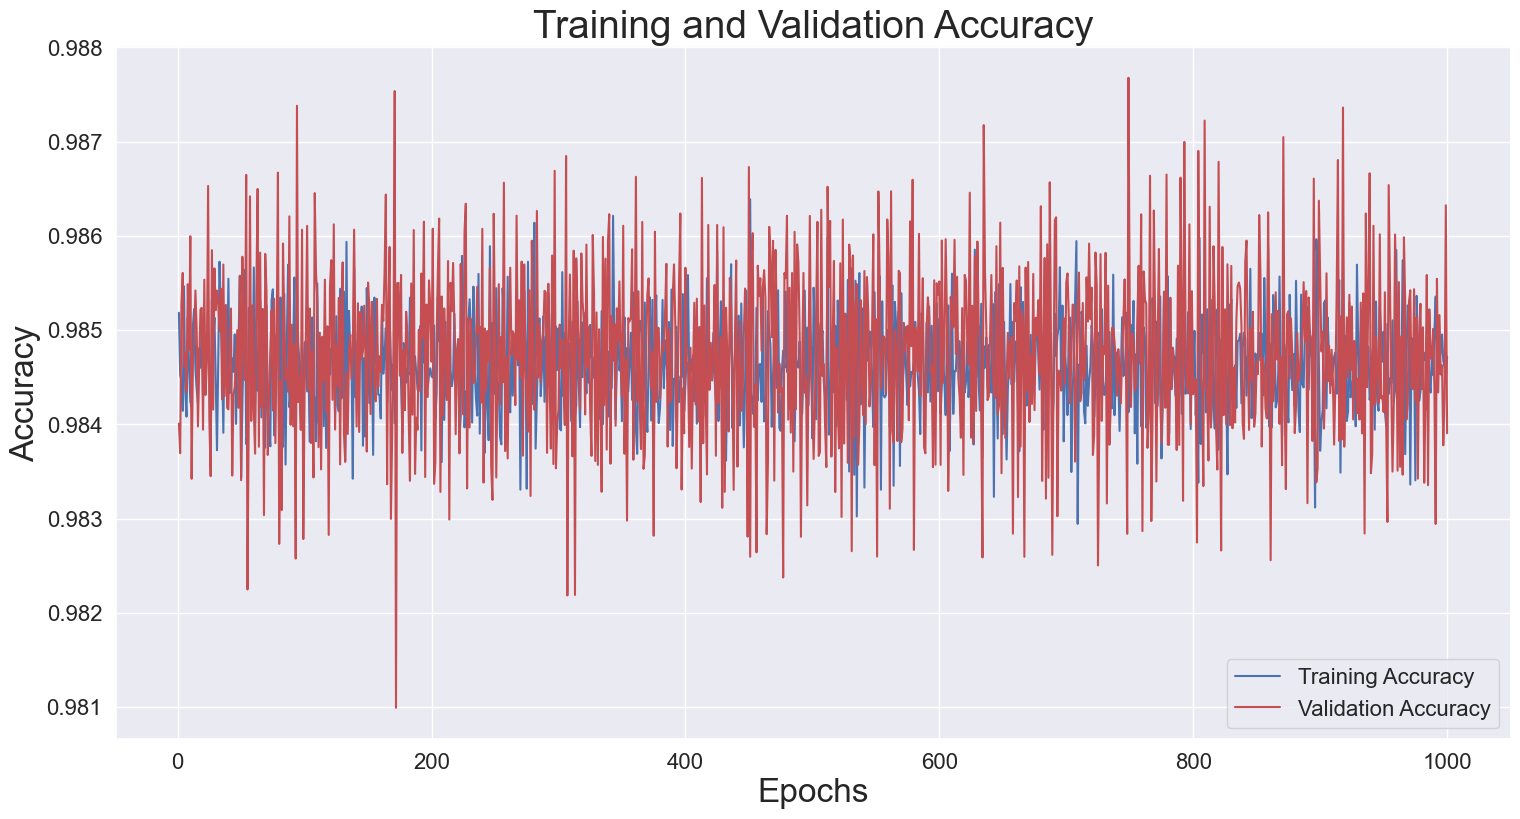

In [51]:
plot_accuracy()

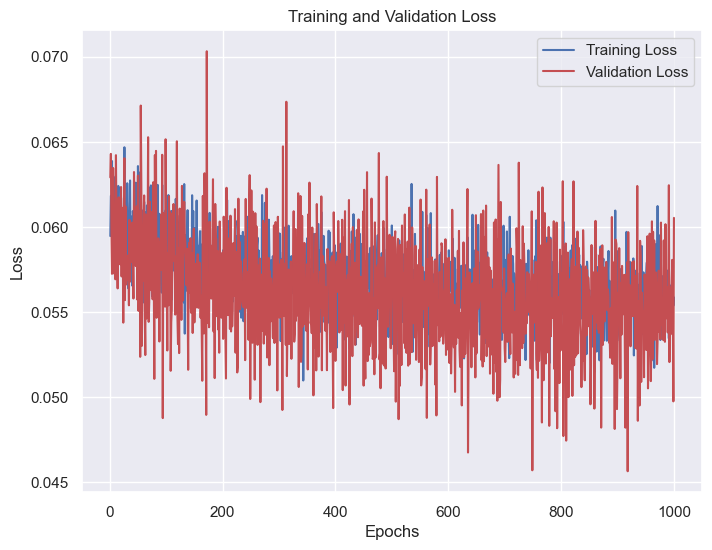

In [52]:
plot_loss()

1/1 [==============================] - 0s 20ms/step


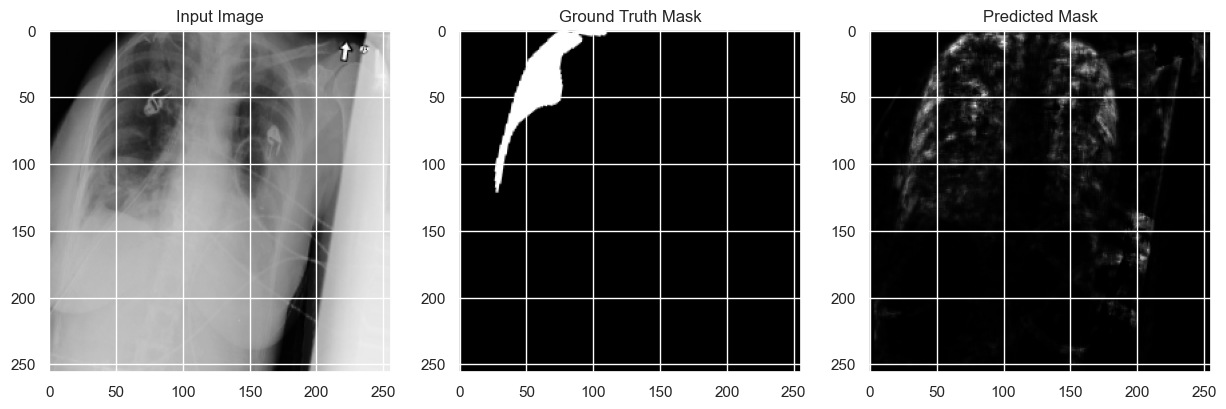

In [53]:
def visualize_prediction(model, test_generator):
    test_images, test_masks = next(test_generator)
    test_image = test_images[0]
    test_mask = test_masks[0]
    
    prediction = model.predict(np.expand_dims(test_image, axis=0))[0]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(test_image.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth Mask')
    plt.imshow(test_mask.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted Mask')
    plt.imshow(prediction.squeeze(), cmap='gray')
    
    plt.show()

# Visualize the prediction for one test image
visualize_prediction(model, test_generator)

In [54]:
best_model = load_model('unet_best_model.h5')

1/1 [==============================] - 0s 20ms/step


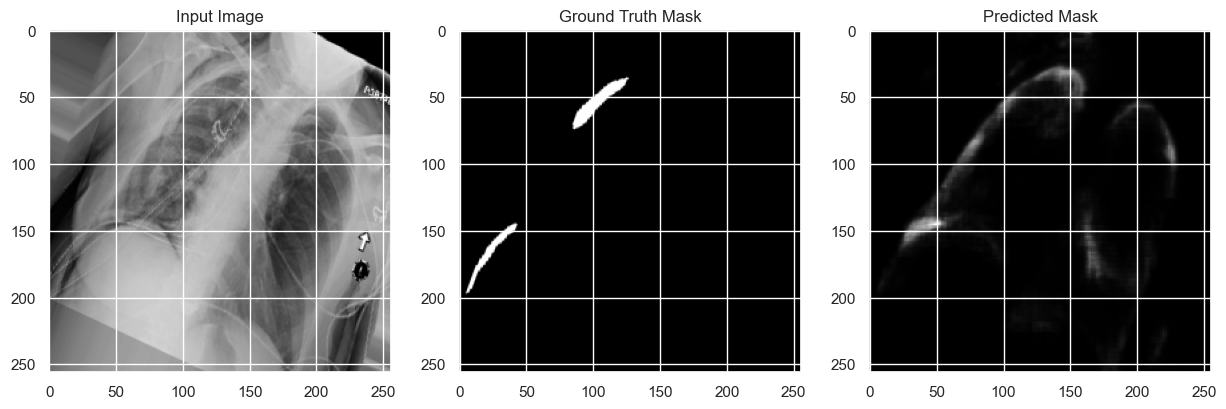

In [63]:
def visualize_prediction(model, test_generator):
    test_images, test_masks = next(test_generator)
    test_image = test_images[0]
    test_mask = test_masks[0]
    
    prediction = model.predict(np.expand_dims(test_image, axis=0))[0]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(test_image.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth Mask')
    plt.imshow(test_mask.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted Mask')
    plt.imshow(prediction.squeeze(), cmap='gray')
    
    plt.show()

# Visualize the prediction for one test image
visualize_prediction(best_model, test_generator)

# Moving images to create train and test

In [2]:
import pandas as pd
import shutil
import os

csv_file_path = r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\Chest X-Ray Images with Pneumothorax Masks\siim-acr-pneumothorax\stage_1_train_images.csv"
source_folder = r"D:\CODES\Code for pneumothorax segmentation\Dataset\png_masks"
destination_folder = r"D:\CODES\Code for pneumothorax segmentation\Dataset\Train Masks"

os.makedirs(destination_folder, exist_ok=True)

df = pd.read_csv(csv_file_path)

for filename in df['new_filename']:

    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)


    if os.path.exists(source_file):

        shutil.move(source_file, destination_file)
        print(f'Moved: {filename}')

    else:
        print(f'File not found: {filename}')


Moved: 0_train_0_.png
Moved: 1_train_0_.png
Moved: 2_train_1_.png
Moved: 3_train_1_.png
Moved: 4_train_1_.png
Moved: 5_train_0_.png
Moved: 6_train_0_.png
Moved: 7_train_1_.png
Moved: 8_train_1_.png
Moved: 9_train_0_.png
Moved: 10_train_1_.png
Moved: 11_train_1_.png
Moved: 12_train_0_.png
Moved: 13_train_1_.png
Moved: 14_train_0_.png
Moved: 15_train_1_.png
Moved: 16_train_1_.png
Moved: 17_train_0_.png
Moved: 18_train_1_.png
Moved: 19_train_1_.png
Moved: 20_train_1_.png
Moved: 21_train_0_.png
Moved: 22_train_0_.png
Moved: 23_train_1_.png
Moved: 24_train_0_.png
Moved: 25_train_0_.png
Moved: 26_train_1_.png
Moved: 27_train_1_.png
Moved: 28_train_1_.png
Moved: 29_train_1_.png
Moved: 30_train_1_.png
Moved: 31_train_0_.png
Moved: 32_train_0_.png
Moved: 33_train_0_.png
Moved: 34_train_1_.png
Moved: 35_train_1_.png
Moved: 36_train_0_.png
Moved: 37_train_0_.png
Moved: 38_train_1_.png
Moved: 39_train_1_.png
Moved: 40_train_1_.png
Moved: 41_train_0_.png
Moved: 42_train_0_.png
Moved: 43_train_1_.pn

# Divide Pnemo and Non-Pneumo images 

In [10]:
csv_file_path = r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\Chest X-Ray Images with Pneumothorax Masks\siim-acr-pneumothorax\stage_1_train_images.csv"
source_folder = r"D:\CODES\Code for pneumothorax segmentation\Dataset\Train Masks"
destination_folder = r"D:\CODES\Code for pneumothorax segmentation\Dataset\Pneumonia"

os.makedirs(destination_folder, exist_ok=True)

df = pd.read_csv(csv_file_path)

for index, row in df.iterrows():
    filename = row['new_filename']
    has_pneumo = row['has_pneumo']

    if has_pneumo == 1:

        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)

        if os.path.exists(source_file):

            shutil.move(source_file, destination_file)
            print(f'Moved: {filename}')

        else:
            print(f'File not found: {filename}')

        

Moved: 2_train_1_.png
Moved: 3_train_1_.png
Moved: 4_train_1_.png
Moved: 7_train_1_.png
Moved: 8_train_1_.png
Moved: 10_train_1_.png
Moved: 11_train_1_.png
Moved: 13_train_1_.png
Moved: 15_train_1_.png
Moved: 16_train_1_.png
Moved: 18_train_1_.png
Moved: 19_train_1_.png
Moved: 20_train_1_.png
Moved: 23_train_1_.png
Moved: 26_train_1_.png
Moved: 27_train_1_.png
Moved: 28_train_1_.png
Moved: 29_train_1_.png
Moved: 30_train_1_.png
Moved: 34_train_1_.png
Moved: 35_train_1_.png
Moved: 38_train_1_.png
Moved: 39_train_1_.png
Moved: 40_train_1_.png
Moved: 43_train_1_.png
Moved: 44_train_1_.png
Moved: 45_train_1_.png
Moved: 46_train_1_.png
Moved: 47_train_1_.png
Moved: 48_train_1_.png
Moved: 49_train_1_.png
Moved: 51_train_1_.png
Moved: 52_train_1_.png
Moved: 53_train_1_.png
Moved: 55_train_1_.png
Moved: 56_train_1_.png
Moved: 57_train_1_.png
Moved: 59_train_1_.png
Moved: 60_train_1_.png
Moved: 61_train_1_.png
Moved: 62_train_1_.png
Moved: 63_train_1_.png
Moved: 64_train_1_.png
Moved: 65_train_